# Coursework_18683679_GOOG_20141105

 Here, a dataset is chosen to perform analysis like Midprice, Microprice, Spread & Order Imbalance. To Find the above points, we start off by importing the necessary libraries to run the python code. 

In [1]:
import scipy.io as sio  # for loading data from the matlab format

import numpy as np      # for numerical data and libraries

import pandas as pd     # for converting into data frame

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting figures and graphs

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

First Step, to load the selected data. 

In [2]:
data = sio.loadmat('GOOG_20141105.mat')

In [3]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

# MID-PRICE

In [4]:
midprice = 0.5*(bid[:,0]+ask[:,0])

In [5]:
df = pd.DataFrame(midprice)
df

,0
0,556.875
1,556.775
2,556.775
3,556.765
4,556.765
...,...
233995,545.885
233996,545.845
233997,545.850
233998,545.850


In [6]:
df.describe()

,0
count,234000.000000
mean,547.490322
std,2.247516
min,544.095000
25%,545.880000
50%,547.390000
75%,548.105000
max,556.875000


Plotting the mid-price

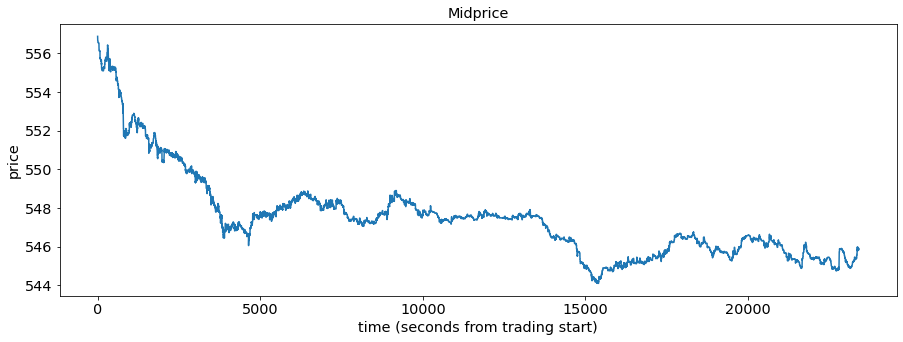

In [7]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()


# MICRO-PRICE 

In [8]:
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])

In [9]:
df = pd.DataFrame(microprice)
df

,0
0,556.856085
1,556.761905
2,556.691964
3,556.666358
4,556.666358
...,...
233995,545.799831
233996,545.845000
233997,545.820931
233998,545.820931


In [10]:
df.describe()

,0
count,234000.000000
mean,547.478088
std,2.246340
min,544.037925
25%,545.875349
50%,547.382979
75%,548.094231
max,556.856085


Plotting the micro-price

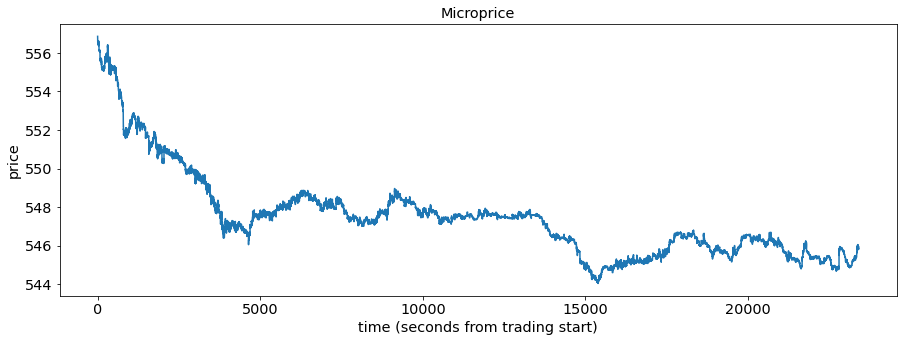

In [11]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

# SPREAD

In [12]:
spread = ask[:,0]-bid[:,0]

In [13]:
df = pd.DataFrame(spread)
df

,0
0,0.65
1,0.45
2,0.45
3,0.47
4,0.47
...,...
233995,0.23
233996,0.15
233997,0.14
233998,0.14


In [14]:
np.array(df)

array([[0.65],
       [0.45],
       [0.45],
       ...,
       [0.14],
       [0.14],
       [0.14]])

In [15]:
df.describe()

,0
count,234000.000000
mean,0.206261
std,0.084253
min,0.010000
25%,0.150000
50%,0.200000
75%,0.260000
max,0.670000


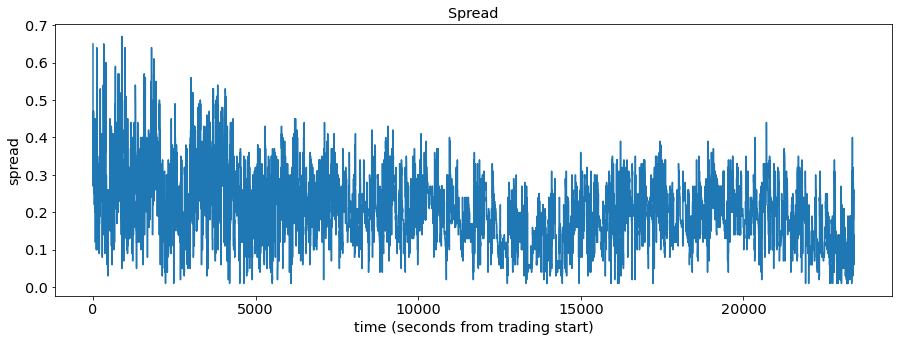

In [16]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

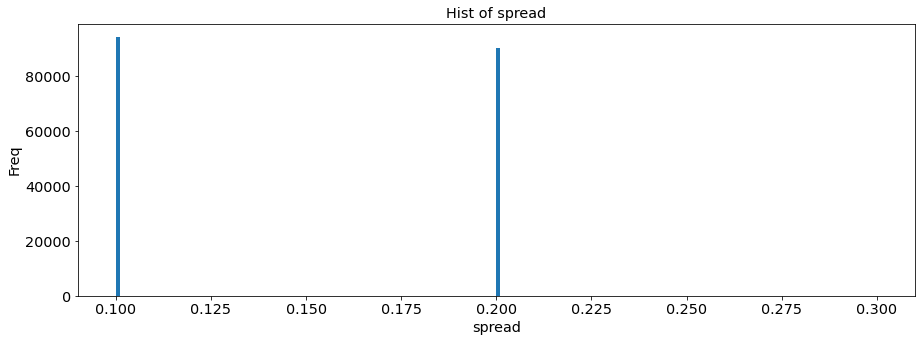

In [17]:
plt.hist(spread,bins=[0.1,0.2,0.3], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

# VOLUME IMBALANCE

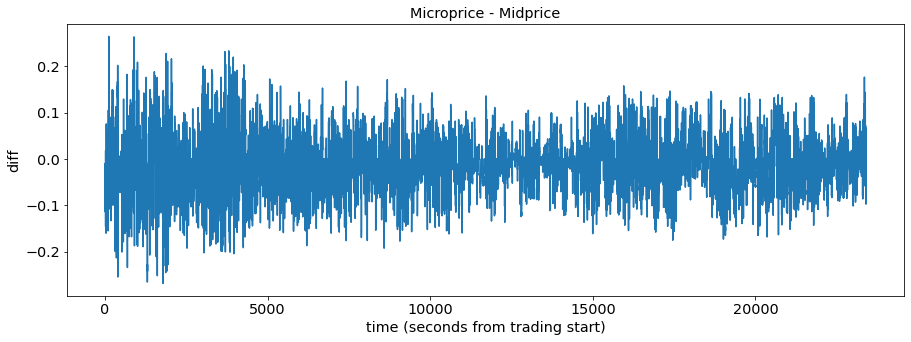

In [18]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [19]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

In [20]:
df = pd.DataFrame(rho)
df

,0
0,-0.058201
1,-0.058201
2,-0.369048
3,-0.419753
4,-0.419753
...,...
233995,-0.740597
233996,0.000000
233997,-0.415270
233998,-0.415270


In [21]:
df.describe()

,0
count,234000.000000
mean,-0.118439
std,0.492722
min,-0.997503
25%,-0.489982
50%,-0.047619
75%,0.169263
max,0.998069


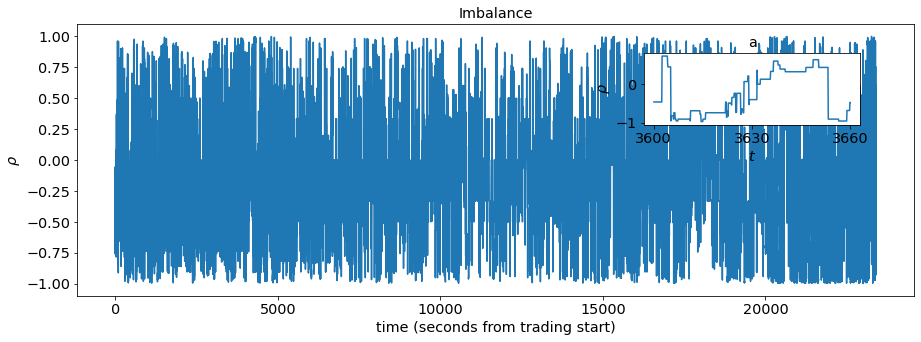

In [22]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

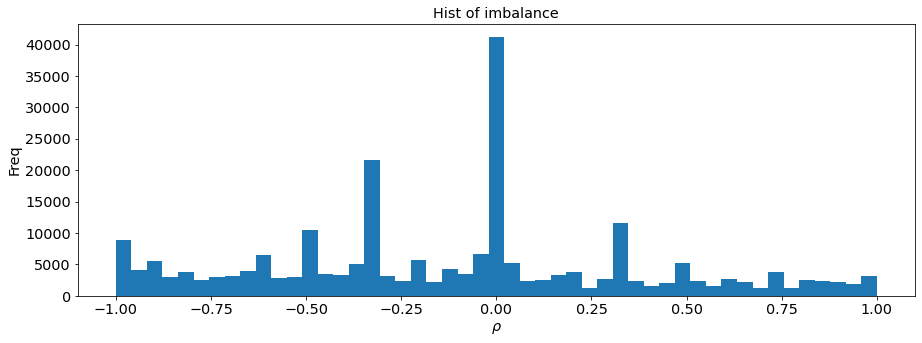

In [23]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

# QUESTION 2 

In [24]:
# Import necessary libraries.
import numpy as np
import import_ipynb
import Liquidation_Price_Impact_Helper as lppi_helpers

importing Jupyter notebook from Liquidation_Price_Impact_Helper.ipynb


In [25]:
# Parameter settings
T = 1 # 1 day
Ndt = 6.5 * 3600 # 6.5 is trading hours multiplied by 60 minutes into 60 seconds
dt = T / Ndt 
t = np.arange(0, T + dt, dt) #T=dt is ending time which is close to 1. 

k = 0.002 
b = 0.004 

tau = T - t 
tt = np.arange(0, 1 + 1 / 10, 1 / 10) 

myphi = np.array([10e-10, 0.001, 0.01, 0.1]) #Inventory Penalty 
symb = np.array(["o", "*", "+", "^"])

alpha = 100 #Terminal Penalty 


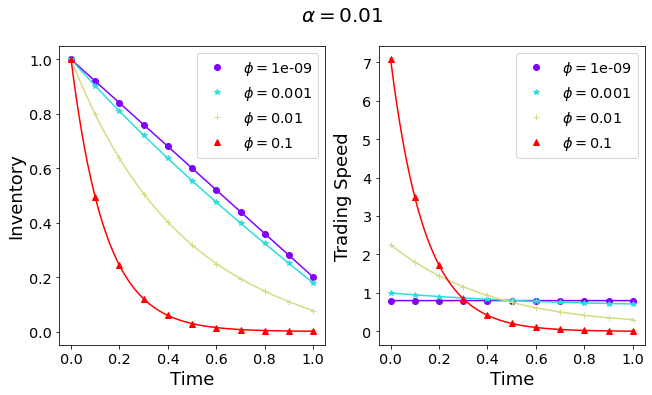

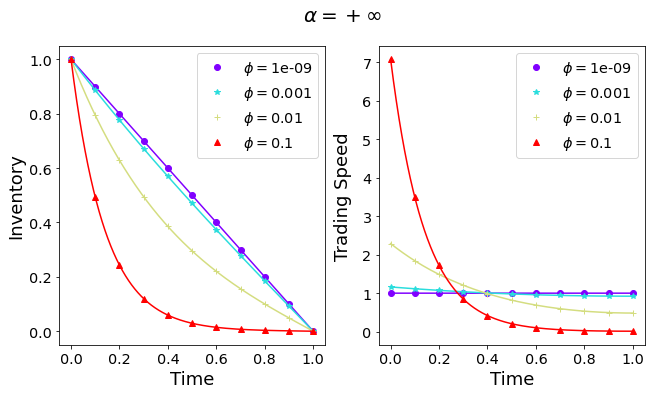

In [26]:
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")

# Optimal Trading Speed 

In [27]:
# Setting up the parameter
S0 = 100
N = 10 ** 6 #Initial number of stocks
T = 1; 
k = 1e-2;
b = 1e-4
M = 10000;    #Number of trading times
alpha = 0.02; 
phi = 0.03;
sigma = 0.30;

In [28]:
gamma = np.sqrt(phi/k);
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi));

In [29]:
tt = np.linspace(0, 1, M + 1)

In [30]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = N  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * N

Text(0.5, 1.0, 'Trading Speed')

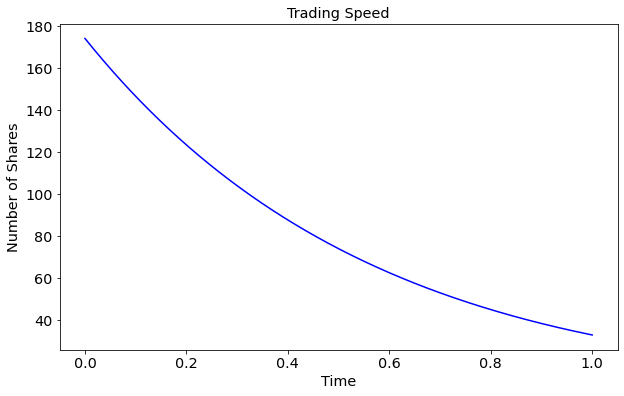

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

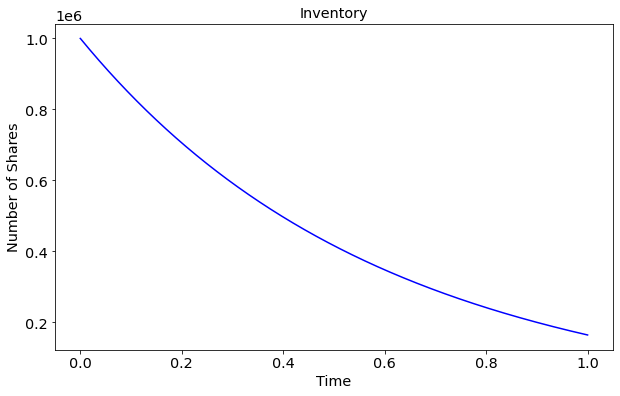

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

# Running Penalty 

In [33]:
T = 1 # 1 day
Ndt = 6.5 * 3600 # 6.5 is trading hours multiplied by 60 minutes into 60 seconds
dt = T / Ndt 
t = np.arange(0, T + dt, dt) #T=dt is ending time which is close to 1. 

k = 0.002 
b = 0.004 

tau = T - t 
tt = np.arange(0, 1 + 1 / 10, 1 / 10) 

myphi = np.array([0.001, 0.01,0.1,1,]) #Inventory Penalty 
symb = np.array(["o", "*", "+", "^"])

alpha = 200 

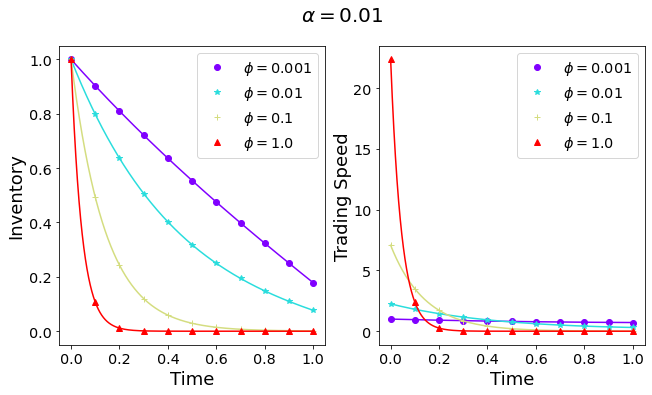

In [34]:
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")


# Liquidation Penalty Goes To Infinity 

In [35]:
T = 1 # 1 day
Ndt = 6.5 * 3600 # 6.5 is trading hours multiplied by 60 minutes into 60 seconds
dt = T / Ndt 
t = np.arange(0, T + dt, dt) #T=dt is ending time which is close to 1. 

k = 0.002 
b = 0.004 

tau = T - t 
tt = np.arange(0, 1 + 1 / 10, 1 / 10) 

myphi = np.array([0.001, 0.01]) #Inventory Penalty 
symb = np.array(["o", "*"])

alpha = 10000 # We increase the alpha to a larger number which is the Terminal Penalty, initially we set it at 100. 

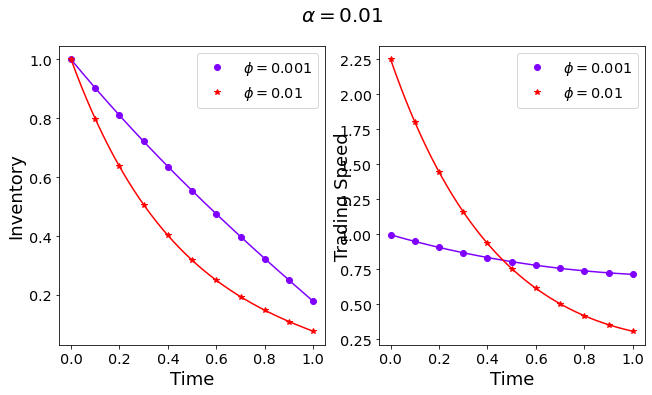

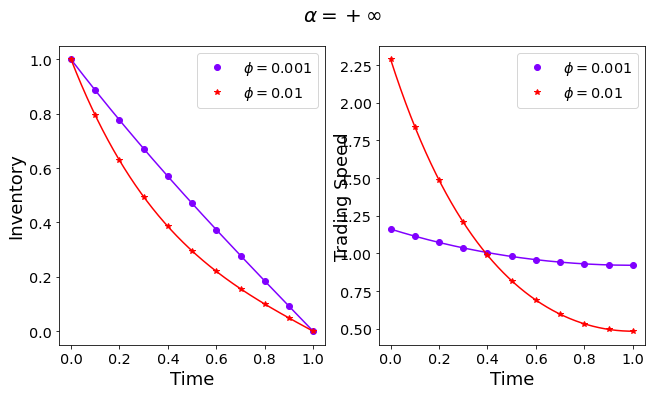

In [36]:
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(10000, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")